In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

/Users/hsu022210/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
gb_data = pd.read_csv('goodBellyData.csv')
gb_data.shape

(1386, 41)

In [3]:
gb_data.columns

Index(['Date', 'Region', 'Store', 'Units Sold', 'Average Retail Price',
       'Sales Rep', 'Endcap', 'Demo', 'Demo1-3', 'Demo4-5', 'Natural',
       'Fitness', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40'],
      dtype='object')

In [4]:
gb_data = gb_data.iloc[:, 1:12]
gb_data.columns = [c.replace('-', '_').replace(' ', '_') for c in gb_data.columns]
gb_data.head()

,Region,Store,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1_3,Demo4_5,Natural,Fitness
0,FL,Biscayne (aka Aventura),150.702088,4.390000,0,0,0,0,0,1,0
1,FL,Biscayne (aka Aventura),197.403797,3.997692,0,0,0,0,0,1,0
2,FL,Biscayne (aka Aventura),235.106171,3.809231,0,0,0,0,0,1,0
3,FL,Biscayne (aka Aventura),226.692427,3.835000,0,0,0,0,0,1,0
4,FL,Biscayne (aka Aventura),257.688151,3.902500,0,0,0,0,0,1,0


In [5]:
gb_data.describe()

,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1_3,Demo4_5,Natural,Fitness
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,253.820718,4.107093,0.549784,0.038240,0.058442,0.156566,0.075758,1.448773,2.476190
std,110.998731,0.463828,0.497695,0.191843,0.234661,0.363522,0.264705,0.975092,1.592789
min,47.559852,2.889286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189.995471,3.775714,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,236.735266,4.096667,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,295.804391,4.425067,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
max,1041.200256,6.251538,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000


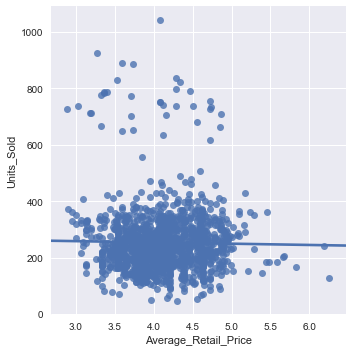

In [6]:
lmplot = sns.lmplot("Average_Retail_Price", "Units_Sold",data=gb_data, ci = None)

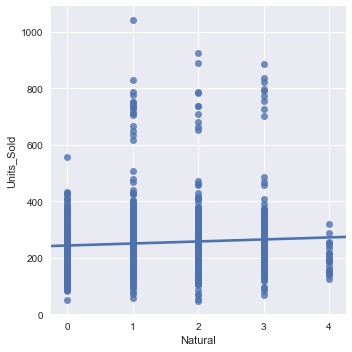

In [7]:
lmplot = sns.lmplot("Natural", "Units_Sold",data=gb_data, ci = None)

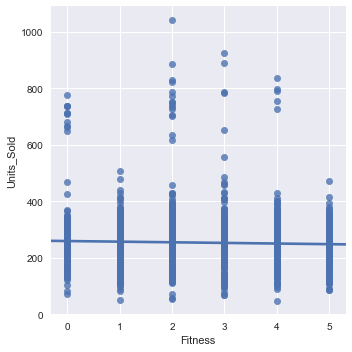

In [8]:
lmplot = sns.lmplot("Fitness", "Units_Sold",data=gb_data, ci = None)

In [9]:
col_list = []
for c in gb_data.columns:
    if c == "Date" or c == "Units_Sold" or c == "Region" or c == "Store":
        continue
    elif c == "Average_Retail_Price" or c == "Natural" or c == "Fitness":
        col_list.append(c)
    else:
        col_list.append("C(" + c + ")")
predictor_vars = " + ".join(col_list)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

Average_Retail_Price + C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5) + Natural + Fitness
MSR: 1434747.40613
MSE: 4056.80146487
Coefficients:
 Intercept               298.488131
C(Sales_Rep)[T.1]        77.436914
C(Endcap)[T.1]          305.102123
C(Demo)[T.1]            111.132849
C(Demo1_3)[T.1]          73.517171
C(Demo4_5)[T.1]          67.569811
Average_Retail_Price    -28.535365
Natural                  -1.594168
Fitness                  -1.019671
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     353.7
Date:                Fri, 23 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:37:49   Log-Likelihood:                -7719.7
No. Observations:                1386   AIC:                         1.546e+04
Df Residuals:                    1377   BIC:                         1.550e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              298.4881     16.183     18.444      0.000     266.742     330.234
C(Sales_Rep)[T.1]       77.4369      3.864     20.038      0.000      69.856      85.018
C(Endcap)[T.1]         305.1021      9.056     33.692      0.000     287.338     322.867
C(Demo)[T.1]           111.1328      7.404     15.010      0.000      96.609     125.657
C(Demo1_3)[T.1]         73.5172      4.895     15.018      0.000      63.914      83.120
C(Demo4_5)[T.1]         67.5698      6.542     10.329      0.000      54.736      80.403
Average_Retail_Price   -28.5354      3.952     -7.220      0.000     -36.288     -20.782
Natural                 -1.5942      1.776     -0.897      0.370      -5.079       1.891
Fitness                 -1.0197      1.084     -0.941      0.347      -3.146       1.107
==============================================================================
Omnibus:                      320.450   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1918.201
Skew:                          -0.934   Prob(JB):                         0.00
Kurtosis:                       8.452   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
col_list.remove("Natural")
col_list.remove("Fitness")
predictor_vars = " + ".join(col_list)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

Average_Retail_Price + C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5)
MSR: 1911943.5417
MSE: 4055.49935895
Coefficients:
 Intercept               294.189036
C(Sales_Rep)[T.1]        76.951206
C(Endcap)[T.1]          304.959716
C(Demo)[T.1]            111.260534
C(Demo1_3)[T.1]          73.663094
C(Demo4_5)[T.1]          67.700203
Average_Retail_Price    -28.609165
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     471.4
Date:                Fri, 23 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:37:49   Log-Likelihood:                -7720.5
No. Observations:                1386   AIC:                         1.545e+04
Df Residuals:                    1379   BIC:                         1.549e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              294.1890     15.787     18.635      0.000     263.220     325.158
C(Sales_Rep)[T.1]       76.9512      3.841     20.035      0.000      69.417      84.486
C(Endcap)[T.1]         304.9597      9.014     33.831      0.000     287.277     322.643
C(Demo)[T.1]           111.2605      7.401     15.033      0.000      96.742     125.779
C(Demo1_3)[T.1]         73.6631      4.891     15.060      0.000      64.068      83.258
C(Demo4_5)[T.1]         67.7002      6.539     10.353      0.000      54.872      80.528
Average_Retail_Price   -28.6092      3.945     -7.253      0.000     -36.347     -20.871
==============================================================================
Omnibus:                      324.016   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1964.703
Skew:                          -0.942   Prob(JB):                         0.00
Kurtosis:                       8.520   Cond. No.                         41.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
gb_data.corr()

,Units_Sold,Average_Retail_Price,Sales_Rep,Endcap,Demo,Demo1_3,Demo4_5,Natural,Fitness
Units_Sold,1.000000,-0.018829,0.449440,0.593216,0.329358,0.384602,0.198331,0.062784,-0.031772
Average_Retail_Price,-0.018829,1.000000,0.328900,-0.067294,0.051664,-0.015098,0.087936,-0.004812,0.071175
Sales_Rep,0.449440,0.328900,1.000000,0.051887,0.151264,0.242227,0.138508,0.089319,0.057511
Endcap,0.593216,-0.067294,0.051887,1.000000,0.078630,0.090093,-0.000215,0.081884,-0.059635
Demo,0.329358,0.051664,0.151264,0.078630,1.000000,0.036549,-0.013209,-0.001106,0.006623
Demo1_3,0.384602,-0.015098,0.242227,0.090093,0.036549,1.000000,0.011710,-0.004856,0.008313
Demo4_5,0.198331,0.087936,0.138508,-0.000215,-0.013209,0.011710,1.000000,0.013648,-0.011987
Natural,0.062784,-0.004812,0.089319,0.081884,-0.001106,-0.004856,0.013648,1.000000,-0.085628
Fitness,-0.031772,0.071175,0.057511,-0.059635,0.006623,0.008313,-0.011987,-0.085628,1.000000


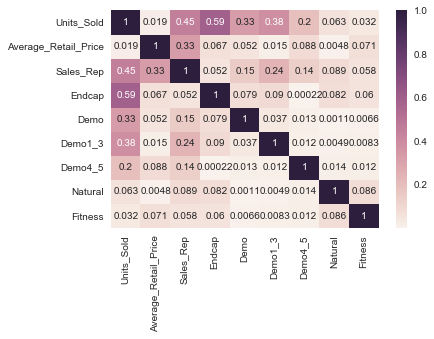

In [12]:
correlationMatrix = gb_data.corr().abs()
sns.heatmap(correlationMatrix,annot=True)

In [13]:
model = sm.OLS.from_formula("Units_Sold ~ Average_Retail_Price", gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

MSR: 6049.52517999
MSE: 12325.2495238
Coefficients:
 Intercept               272.326736
Average_Retail_Price     -4.505868
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4908
Date:                Fri, 23 Mar 2018   Prob (F-statistic):              0.484
Time:                        15:37:52   Log-Likelihood:                -8493.3
No. Observations:                1386   AIC:                         1.699e+04
Df Residuals:                    1384   BIC:                         1.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              272.3267     26.583     10.244      0.000     220.180     324.474
Average_Retail_Price    -4.5059      6.432     -0.701      0.484     -17.123       8.111
==============================================================================
Omnibus:                      811.019   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8125.659
Skew:                           2.585   Prob(JB):                         0.00
Kurtosis:                      13.676   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

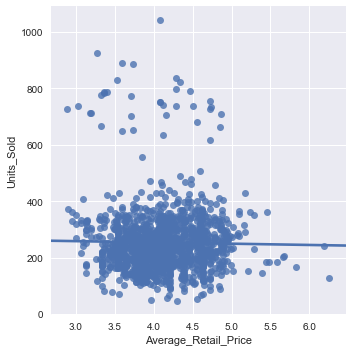

In [14]:
lmplot = sns.lmplot("Average_Retail_Price", "Units_Sold",data=gb_data, ci = None)

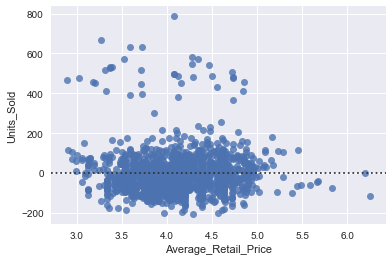

In [15]:
sns.residplot(gb_data['Average_Retail_Price'], gb_data['Units_Sold'])

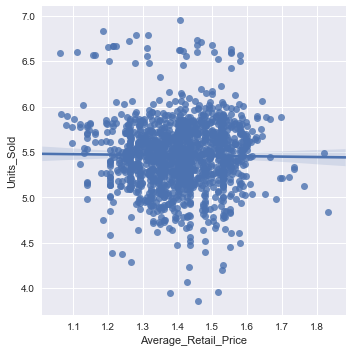

In [16]:
gb_data_2 = gb_data.copy()
gb_data_2.loc[:,'Average_Retail_Price'] = np.log(gb_data_2.loc[:,'Average_Retail_Price'])
gb_data_2.loc[:,'Units_Sold'] = np.log(gb_data_2.loc[:,'Units_Sold'])
sns.lmplot("Average_Retail_Price", "Units_Sold",data=gb_data_2)

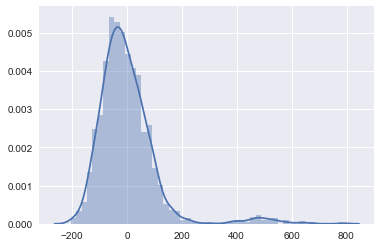

In [17]:
sns.distplot(model.resid, bins=50)

In [18]:
col_list.remove("Average_Retail_Price")
predictor_vars = " + ".join(col_list)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5)
MSR: 2251669.03293
MSE: 4207.13746488
Coefficients:
 Intercept            181.243383
C(Sales_Rep)[T.1]     67.658944
C(Endcap)[T.1]       310.331985
C(Demo)[T.1]         110.751351
C(Demo1_3)[T.1]       77.069866
C(Demo4_5)[T.1]       65.651948
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     535.2
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          6.22e-320
Time:                        15:37:56   Log-Likelihood:                -7746.4
No. Observations:                1386   AIC:                         1.550e+04
Df Residuals:                    1380   BIC:                         1.554e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           181.2434      2.637     68.718      0.000     176.069     186.417
C(Sales_Rep)[T.1]    67.6589      3.688     18.346      0.000      60.425      74.893
C(Endcap)[T.1]      310.3320      9.150     33.915      0.000     292.382     328.282
C(Demo)[T.1]        110.7514      7.538     14.693      0.000      95.965     125.538
C(Demo1_3)[T.1]      77.0699      4.959     15.542      0.000      67.342      86.798
C(Demo4_5)[T.1]      65.6519      6.654      9.866      0.000      52.599      78.705
==============================================================================
Omnibus:                      338.168   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2050.781
Skew:                          -0.990   Prob(JB):                         0.00
Kurtosis:                       8.621   Cond. No.                         6.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

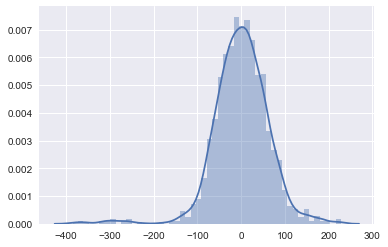

In [19]:
sns.distplot(model.resid, bins=50)

In [20]:
col_list_try = col_list.copy()
col_list_try.remove("C(Demo)")
col_list_try.remove("C(Demo1_3)")
col_list_try.remove("C(Demo4_5)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap)
MSR: 4501996.53684
MSE: 5828.0562491
Coefficients:
 Intercept            189.704820
C(Sales_Rep)[T.1]     93.623920
C(Endcap)[T.1]       330.626533
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     772.5
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          5.63e-226
Time:                        15:37:58   Log-Likelihood:                -7973.8
No. Observations:                1386   AIC:                         1.595e+04
Df Residuals:                    1383   BIC:                         1.597e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           189.7048      3.070     61.793      0.000     183.682     195.727
C(Sales_Rep)[T.1]    93.6239      4.127     22.684      0.000      85.528     101.720
C(Endcap)[T.1]      330.6265     10.707     30.879      0.000     309.622     351.631
==============================================================================
Omnibus:                      145.816   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              857.147
Skew:                          -0.283   Prob(JB):                    7.46e-187
Kurtosis:                       6.811   Cond. No.                         6.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
col_list_try = col_list.copy()
col_list_try.remove("C(Endcap)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Demo) + C(Demo1_3) + C(Demo4_5)
MSR: 1604774.2523
MSE: 7708.25333599
Coefficients:
 Intercept            188.571246
C(Sales_Rep)[T.1]     70.225412
C(Demo)[T.1]         129.103185
C(Demo1_3)[T.1]       90.546768
C(Demo4_5)[T.1]       64.933301
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     208.2
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          8.09e-140
Time:                        15:37:59   Log-Likelihood:                -8166.5
No. Observations:                1386   AIC:                         1.634e+04
Df Residuals:                    1381   BIC:                         1.637e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           188.5712      3.558     52.999      0.000     181.591     195.551
C(Sales_Rep)[T.1]    70.2254      4.991     14.071      0.000      60.435      80.016
C(Demo)[T.1]        129.1032     10.177     12.686      0.000     109.140     149.066
C(Demo1_3)[T.1]      90.5468      6.691     13.533      0.000      77.422     103.672
C(Demo4_5)[T.1]      64.9333      9.007      7.209      0.000      47.265      82.602
==============================================================================
Omnibus:                      958.161   Durbin-Watson:                   1.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13476.173
Skew:                           3.103   Prob(JB):                         0.00
Kurtosis:                      16.959   Cond. No.                         5.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
col_list_try = col_list.copy()
col_list_try.append("C(Endcap)*C(Demo)")
col_list_try.append("C(Endcap)*C(Demo1_3)")
col_list_try.append("C(Endcap)*C(Demo4_5)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5) + C(Endcap)*C(Demo) + C(Endcap)*C(Demo1_3) + C(Endcap)*C(Demo4_5)
MSR: 1435256.01908
MSE: 4053.84656031
Coefficients:
 Intercept                         182.501795
C(Sales_Rep)[T.1]                  68.066289
C(Endcap)[T.1]                    266.080976
C(Demo)[T.1]                       99.095179
C(Demo1_3)[T.1]                    70.577514
C(Demo4_5)[T.1]                    67.396251
C(Endcap)[T.1]:C(Demo)[T.1]       129.316147
C(Endcap)[T.1]:C(Demo1_3)[T.1]     97.019992
C(Endcap)[T.1]:C(Demo4_5)[T.1]    -55.820918
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     354.0
Date:                Fri, 23 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:37:59   Log-Likelihood:                -7719.2
No. Observations:                1386   AIC:                         1.546e+04
Df Residuals:                    1377   BIC:                         1.550e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        182.5018      2.595     70.326      0.000     177.411     187.593
C(Sales_Rep)[T.1]                 68.0663      3.626     18.771      0.000      60.953      75.180
C(Endcap)[T.1]                   266.0810     11.602     22.934      0.000     243.322     288.840
C(Demo)[T.1]                      99.0952      7.753     12.781      0.000      83.885     114.305
C(Demo1_3)[T.1]                   70.5775      5.028     14.038      0.000      60.715      80.440
C(Demo4_5)[T.1]                   67.3963      6.668     10.107      0.000      54.316      80.477
C(Endcap)[T.1]:C(Demo)[T.1]      129.3161     25.713      5.029      0.000      78.876     179.757
C(Endcap)[T.1]:C(Demo1_3)[T.1]    97.0200     19.411      4.998      0.000      58.941     135.099
C(Endcap)[T.1]:C(Demo4_5)[T.1]   -55.8209     33.942     -1.645      0.100    -122.405      10.763
==============================================================================
Omnibus:                      306.244   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2105.510
Skew:                          -0.844   Prob(JB):                         0.00
Kurtosis:                       8.798   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
col_list_try = col_list.copy()
col_list_try.append("C(Endcap)*C(Demo)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5) + C(Endcap)*C(Demo)
MSR: 1894424.75946
MSE: 4131.72321206
Coefficients:
 Intercept                      181.812105
C(Sales_Rep)[T.1]               67.973535
C(Endcap)[T.1]                 291.497211
C(Demo)[T.1]                    98.790920
C(Demo1_3)[T.1]                 76.886283
C(Demo4_5)[T.1]                 64.892823
C(Endcap)[T.1]:C(Demo)[T.1]    132.327043
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     458.5
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          4.94e-324
Time:                        15:38:00   Log-Likelihood:                -7733.4
No. Observations:                1386   AIC:                         1.548e+04
Df Residuals:                    1379   BIC:                         1.552e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     181.8121      2.616     69.497      0.000     176.680     186.944
C(Sales_Rep)[T.1]              67.9735      3.655     18.596      0.000      60.803      75.144
C(Endcap)[T.1]                291.4972      9.786     29.786      0.000     272.300     310.695
C(Demo)[T.1]                   98.7909      7.827     12.622      0.000      83.437     114.145
C(Demo1_3)[T.1]                76.8863      4.914     15.645      0.000      67.246      86.527
C(Demo4_5)[T.1]                64.8928      6.596      9.838      0.000      51.954      77.832
C(Endcap)[T.1]:C(Demo)[T.1]   132.3270     25.858      5.117      0.000      81.602     183.052
==============================================================================
Omnibus:                      313.838   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1926.066
Skew:                          -0.904   Prob(JB):                         0.00
Kurtosis:                       8.485   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
col_list_try = col_list.copy()
col_list_try.remove("C(Sales_Rep)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5)
MSR: 2460567.95166
MSE: 5229.48809526
Coefficients:
 Intercept          212.395301
C(Endcap)[T.1]     313.776635
C(Demo)[T.1]       131.271734
C(Demo1_3)[T.1]     98.710466
C(Demo4_5)[T.1]     83.164612
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     470.5
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          5.57e-256
Time:                        15:38:01   Log-Likelihood:                -7897.7
No. Observations:                1386   AIC:                         1.581e+04
Df Residuals:                    1381   BIC:                         1.583e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         212.3953      2.250     94.394      0.000     207.981     216.809
C(Endcap)[T.1]    313.7766     10.199     30.764      0.000     293.769     333.785
C(Demo)[T.1]      131.2717      8.311     15.795      0.000     114.969     147.575
C(Demo1_3)[T.1]    98.7105      5.370     18.382      0.000      88.176     109.245
C(Demo4_5)[T.1]    83.1646      7.342     11.327      0.000      68.762      97.567
==============================================================================
Omnibus:                      358.381   Durbin-Watson:                   1.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2290.492
Skew:                          -1.041   Prob(JB):                         0.00
Kurtosis:                       8.943   Cond. No.                         5.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
col_list_try = col_list.copy()
col_list_try.append("C(Region)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5) + C(Region)
MSR: 757360.794124
MSE: 4278.48665971
Coefficients:
 Intercept            148.168474
C(Sales_Rep)[T.1]     42.865722
C(Endcap)[T.1]       310.554130
C(Demo)[T.1]         110.440995
C(Demo1_3)[T.1]       76.627907
C(Demo4_5)[T.1]       65.921051
C(Region)[T.MA]       41.729306
C(Region)[T.MW]       60.097329
C(Region)[T.NC]       60.827909
C(Region)[T.NE]       49.178868
C(Region)[T.PN]       75.466979
C(Region)[T.RM]       49.234788
C(Region)[T.SO]       43.993695
C(Region)[T.SP]       50.992793
C(Region)[T.SW]       30.190915
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     177.0
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          1.92e-282
Time:                        15:38:01   Log-Likelihood:                -6952.8
No. Observations:                1243   AIC:                         1.394e+04
Df Residuals:                    1228   BIC:                         1.401e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           148.1685      7.077     20.936      0.000     134.284     162.053
C(Sales_Rep)[T.1]    42.8657     14.064      3.048      0.002      15.274      70.457
C(Endcap)[T.1]      310.5541      9.621     32.280      0.000     291.680     329.429
C(Demo)[T.1]        110.4410      7.667     14.404      0.000      95.398     125.484
C(Demo1_3)[T.1]      76.6279      5.102     15.020      0.000      66.619      86.637
C(Demo4_5)[T.1]      65.9211      6.848      9.626      0.000      52.485      79.357
C(Region)[T.MA]      41.7293      8.441      4.944      0.000      25.168      58.290
C(Region)[T.MW]      60.0973     16.500      3.642      0.000      27.727      92.468
C(Region)[T.NC]      60.8279     16.561      3.673      0.000      28.337      93.319
C(Region)[T.NE]      49.1789     13.943      3.527      0.000      21.824      76.534
C(Region)[T.PN]      75.4670     17.008      4.437      0.000      42.099     108.835
C(Region)[T.RM]      49.2348     17.002      2.896      0.004      15.879      82.591
C(Region)[T.SO]      43.9937     10.279      4.280      0.000      23.828      64.160
C(Region)[T.SP]      50.9928     16.838      3.028      0.003      17.957      84.028
C(Region)[T.SW]      30.1909     10.279      2.937      0.003      10.025      50.357
==============================================================================
Omnibus:                      271.606   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1366.908
Skew:                          -0.923   Prob(JB):                    1.51e-297
Kurtosis:                       7.794   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
col_list_try = col_list.copy()
col_list_try.append("C(Region)")
col_list_try.append("C(Endcap) * C(Demo)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5) + C(Region) + C(Endcap) * C(Demo)
MSR: 712686.751392
MSE: 4210.86508963
Coefficients:
 Intercept                      150.266069
C(Sales_Rep)[T.1]               43.596554
C(Endcap)[T.1]                 293.961207
C(Demo)[T.1]                    99.522482
C(Demo1_3)[T.1]                 76.257659
C(Demo4_5)[T.1]                 64.887953
C(Region)[T.MA]                 40.293109
C(Region)[T.MW]                 58.464273
C(Region)[T.NC]                 59.612677
C(Region)[T.NE]                 47.312576
C(Region)[T.PN]                 70.422762
C(Region)[T.RM]                 47.774489
C(Region)[T.SO]                 41.896100
C(Region)[T.SP]                 49.528486
C(Region)[T.SW]                 28.093320
C(Endcap)[T.1]:C(Demo)[T.1]    119.769462
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     169.2
Date:                Fri, 23 Mar 2018   Prob (F-statistic):          9.48e-286
Time:                        15:38:02   Log-Likelihood:                -6942.4
No. Observations:                1243   AIC:                         1.392e+04
Df Residuals:                    1227   BIC:                         1.400e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     150.2661      7.036     21.356      0.000     136.462     164.070
C(Sales_Rep)[T.1]              43.5966     13.953      3.125      0.002      16.222      70.971
C(Endcap)[T.1]                293.9612     10.217     28.773      0.000     273.917     314.005
C(Demo)[T.1]                   99.5225      7.976     12.478      0.000      83.875     115.170
C(Demo1_3)[T.1]                76.2577      5.062     15.065      0.000      66.327      86.189
C(Demo4_5)[T.1]                64.8880      6.798      9.545      0.000      51.551      78.225
C(Region)[T.MA]                40.2931      8.380      4.808      0.000      23.852      56.734
C(Region)[T.MW]                58.4643     16.373      3.571      0.000      26.343      90.586
C(Region)[T.NC]                59.6127     16.432      3.628      0.000      27.375      91.850
C(Region)[T.NE]                47.3126     13.838      3.419      0.001      20.163      74.462
C(Region)[T.PN]                70.4228     16.909      4.165      0.000      37.248     103.597
C(Region)[T.RM]                47.7745     16.870      2.832      0.005      14.677      80.872
C(Region)[T.SO]                41.8961     10.208      4.104      0.000      21.870      61.922
C(Region)[T.SP]                49.5285     16.708      2.964      0.003      16.749      82.308
C(Region)[T.SW]                28.0933     10.208      2.752      0.006       8.067      48.120
C(Endcap)[T.1]:C(Demo)[T.1]   119.7695     26.312      4.552      0.000      68.149     171.390
==============================================================================
Omnibus:                      264.218   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1402.474
Skew:                          -0.879   Prob(JB):                    2.86e-305
Kurtosis:                       7.898   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
col_list_try = col_list.copy()
col_list_try.append("C(Region)")
col_list_try.append("C(Endcap) * C(Sales_Rep)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5) + C(Region) + C(Endcap) * C(Sales_Rep)
MSR: 856789.701151
MSE: 2449.21533708
Coefficients:
 Intercept                           187.022879
C(Sales_Rep)[T.1]                    44.577633
C(Endcap)[T.1]                       -1.512372
C(Demo)[T.1]                        104.589822
C(Demo1_3)[T.1]                      74.283244
C(Demo4_5)[T.1]                      72.693001
C(Region)[T.MA]                      12.108724
C(Region)[T.MW]                      20.230969
C(Region)[T.NC]                       6.022346
C(Region)[T.NE]                       9.126384
C(Region)[T.PN]                       8.978258
C(Region)[T.RM]                       3.772883
C(Region)[T.SO]                       5.139290
C(Region)[T.SP]                      10.410918
C(Region)[T.SW]                      -8.663490
C(Endcap)[T.1]:C(Sales_Rep)[T.1]    466.393223
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     349.8
Date:                Fri, 23 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:40:19   Log-Likelihood:                -6605.6
No. Observations:                1243   AIC:                         1.324e+04
Df Residuals:                    1227   BIC:                         1.333e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          187.0229      5.506     33.967      0.000     176.221     197.825
C(Sales_Rep)[T.1]                   44.5776     10.641      4.189      0.000      23.702      65.454
C(Endcap)[T.1]                      -1.5124     12.611     -0.120      0.905     -26.255      23.230
C(Demo)[T.1]                       104.5898      5.804     18.019      0.000      93.202     115.977
C(Demo1_3)[T.1]                     74.2832      3.861     19.240      0.000      66.709      81.858
C(Demo4_5)[T.1]                     72.6930      5.186     14.016      0.000      62.518      82.868
C(Region)[T.MA]                     12.1087      6.461      1.874      0.061      -0.567      24.785
C(Region)[T.MW]                     20.2310     12.553      1.612      0.107      -4.396      44.858
C(Region)[T.NC]                      6.0223     12.660      0.476      0.634     -18.815      30.860
C(Region)[T.NE]                      9.1264     10.632      0.858      0.391     -11.732      29.985
C(Region)[T.PN]                      8.9783     13.054      0.688      0.492     -16.632      34.589
C(Region)[T.RM]                      3.7729     12.951      0.291      0.771     -21.635      29.181
C(Region)[T.SO]                      5.1393      7.882      0.652      0.515     -10.324      20.603
C(Region)[T.SP]                     10.4109     12.810      0.813      0.417     -14.721      35.543
C(Region)[T.SW]                     -8.6635      7.882     -1.099      0.272     -24.127       6.800
C(Endcap)[T.1]:C(Sales_Rep)[T.1]   466.3932     15.392     30.301      0.000     436.196     496.590
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                2.018
Skew:                          -0.092   Prob(JB):                        0.365
Kurtosis:                       3.073   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
col_list_try = col_list.copy()
col_list_try.append("C(Endcap) * C(Sales_Rep)")
predictor_vars = " + ".join(col_list_try)
predicted_var = "Units_Sold"
formula_str = predicted_var + " ~ " + predictor_vars
print(predictor_vars)

model = sm.OLS.from_formula(formula_str, gb_data).fit()
print("MSR:", model.mse_model)
print("MSE:", model.mse_resid)
print("Coefficients:\n", model.params)
# print(model.mse_total)
model.summary()

C(Sales_Rep) + C(Endcap) + C(Demo) + C(Demo1_3) + C(Demo4_5) + C(Endcap) * C(Sales_Rep)
MSR: 2270834.26825
MSE: 2493.97335512
Coefficients:
 Intercept                           189.593039
C(Sales_Rep)[T.1]                    52.042236
C(Endcap)[T.1]                       -0.255131
C(Demo)[T.1]                        106.287830
C(Demo1_3)[T.1]                      75.979833
C(Demo4_5)[T.1]                      73.092376
C(Endcap)[T.1]:C(Sales_Rep)[T.1]    461.257332
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Units_Sold   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     910.5
Date:                Fri, 23 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:52:12   Log-Likelihood:                -7383.5
No. Observations:                1386   AIC:                         1.478e+04
Df Residuals:                    1379   BIC:                         1.482e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          189.5930      2.049     92.544      0.000     185.574     193.612
C(Sales_Rep)[T.1]                   52.0422      2.884     18.043      0.000      46.384      57.700
C(Endcap)[T.1]                      -0.2551     12.300     -0.021      0.983     -24.384      23.873
C(Demo)[T.1]                       106.2878      5.805     18.309      0.000      94.900     117.676
C(Demo1_3)[T.1]                     75.9798      3.818     19.900      0.000      68.490      83.470
C(Demo4_5)[T.1]                     73.0924      5.129     14.251      0.000      63.031      83.154
C(Endcap)[T.1]:C(Sales_Rep)[T.1]   461.2573     14.973     30.805      0.000     431.884     490.630
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.941
Skew:                          -0.063   Prob(JB):                        0.625
Kurtosis:                       3.023   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""